## Bike Share Data Case Study

**Data Source**
'https://divvy-tripdata.s3.amazonaws.com/index.html'

Data comes from Divvy, which is a Chicago bike share system powered by Lyft. This data has been stripped of any identifiable information and limited in it's columns to focus on driving beavior. The data has been made availbale by Motivate Internation Inc under this license 'https://www.divvybikes.com/data-license-agreement' .


**Scenario**
You are a data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Task** 
For question #1 produce a report with the following deliverables
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis




**Statement**
Clean and process the data to find how casual rides differ from members, so that we can use insights in future marketing strategy planning

There are curently 12 months worth of data that need to be merged into one file for analysis

In [143]:
#import packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import glob
import missingno as msno

In [13]:
#Append all 12 files into one csv file 

location = '//Users//jenniferparedes//Desktop//code practice//Bike citi Project //Data//*.csv'
csv_files = glob.glob(location)

#print(csv_files)

data = pd.DataFrame()

for csv_files in csv_files:
    df = pd.read_csv(csv_files)
    data = pd.concat([data, df], ignore_index= True)


data.to_csv('//Users//jenniferparedes//Desktop//code practice//Bike citi Project //Data///all_bike_data.csv', index = False)


In [12]:
#open and load data
data = pd.read_csv('/Users/jenniferparedes/Desktop/Job Hunting/Bike citi Project /Data/all_bike_data.csv')
data.head()

/Users/jenniferparedes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual


In [20]:
#check to see where we might need to clean up data types

df = data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320361 entries, 0 to 3320360
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 329.3+ MB


'\nchange data types\n started_at , ended_at, =date time\n all station names = string\n member_casual, rideable type  = category \n '

The following need to be changed:
* started_at , ended_at, =date time
* all station names = string
* member_casual, rideable type  = category 


In [57]:
#using DataFrame.astype() change data types 

df['started_at'] = pd.to_datetime(df['started_at'],yearfirst= True)
df['ended_at'] = pd.to_datetime(df['ended_at'],yearfirst= True)

#change to category types
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

#change to string type for location names
df['start_station_name'] = df['start_station_name'].astype('string')
df['end_station_name'] = df['end_station_name'].astype('string')
#not sure if this actually changes it to string, it still shows up as a series when dtype(), look into it if it causes errors 


In [105]:
#double check types 
df.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             string
start_station_id               object
end_station_name               string
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
duration_min          timedelta64[ns]
ride_duration         timedelta64[ns]
mins_duration         timedelta64[ns]
dtype: object

Ok so we have 13 columns and we're trying to figure out how members vs non- members behave, we could consider the following to begin

* Average usage time of member vs non  
* Are commuters memebers? Around what time are bikes used most often ?
* Are non members using bikes around tourists locations? dive into locations, what are the most popular stations 
* is ride ID tied to a specific user? maybe we can see repeat customers 

let's start by splitting the time column and getting a duration column for time spend on bike

first though we must start with some **data cleaning**

In [111]:
#drop extra  columns
df = df.drop(columns= ['duration_min'])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27


### Feature Engineering
We need to manipulate the date and time column to create visuals on:
* days of the week
* time of day

This will allow us to see paterns among rides, then we will visualize
* bar graph on above
* histogram to see distribution of data
* comperisons between members & non members 

The we could also identify rider profiles based on behavior
* commuter 
* student / proffesionals
* tourist 
* other

In [120]:
#create new column days of the week, months of the year, and time of day

df['start_year'] = df.started_at.dt.year
df['start_month'] = df.started_at.dt.month
df['start_day_of_week'] = df.started_at.dt.day_name()

#df = df.drop(columns=['day'])

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,year,month,day_of_week,start_year,start_month,s_day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,2020,11,Sunday,2020,11,Sunday
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,2020,11,Sunday,2020,11,Sunday
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,2020,11,Sunday,2020,11,Sunday
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,2020,11,Sunday,2020,11,Sunday
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,2020,11,Sunday,2020,11,Sunday


In [124]:
df.drop(df.columns[[-4, -5, -6]], axis=1, inplace=True) #remove columns
df.head()
#df = df.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,start_year,start_month,s_day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,2020,11,Sunday
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,2020,11,Sunday
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,2020,11,Sunday
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,2020,11,Sunday
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,2020,11,Sunday


In [125]:
#save the new cleaned file 
df.to_csv("all_bike_clean.csv", encoding="utf-8")

### Analyze ###


TypeError: unhashable type: 'numpy.ndarray'

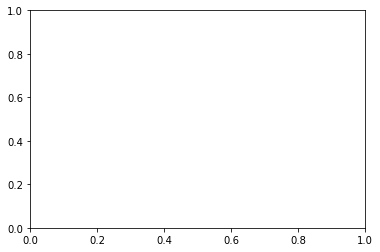

In [155]:
#compare casual rides vs members per week
'''
casual = df[df.member_casual == 'casual']
members = df[df.member_casual == 'members']

#plot 
plt.plot(casual,members)
plt.show()
'''

In [162]:
test = (
    df
    .groupby(['s_day_of_week','member_casual'])
    .member_casual # is this what i want to count?
)
test.head()

0       casual
1       casual
2       casual
3       casual
4       casual
         ...  
2374    member
2426    member
2441    member
2758    member
2759    member
Name: member_casual, Length: 70, dtype: category
Categories (2, object): ['casual', 'member']

<AxesSubplot:xlabel='s_day_of_week', ylabel='Count'>

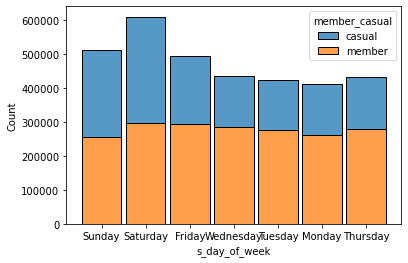

In [138]:
# create histogram for days of the week split by categoty

sns.histplot( x='s_day_of_week', data = df, hue='member_casual', multiple = 'stack', shrink=0.9)

**trends overt time**
